<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/fluidflow/CO2pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install neqsim==2.5.35

In [1]:
%%capture
!pip install neqsim==2.5.35
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
%matplotlib inline

In [25]:
from neqsim import methods
from neqsim.thermo import fluid, TPflash, createfluid2
from neqsim.process import pipe, pipeline, clearProcess, stream, runProcess

#Creating inlet fluid using SRK-EoS
names = ['CO2', 'nitrogen', 'methane', 'ethane']
molefractions = [0.989, 0.005, 0.005, 0.001]
fluid1 = createfluid2(names, molefractions)
fluid1.setMixingRule('classic')

fluid1.setTemperature(30.15, "C")
fluid1.setPressure(200.0, "bara")

TPflash(fluid1)
printFrame(fluid1)

#Creating stream and pipeline
clearProcess()
stream1 = stream(fluid1)
stream1.setFlowRate(100000.0, "kg/hr")
stream1.setTemperature(30.15, "C")
stream1.setPressure(200.0, "bara")

diameter = [0.4, 0.4, 0.4, 0.4, 0.4] #meter
roughnes = [50.0e-6, 50.0e-6, 50.0e-6, 50.0e-6, 50.0e-6] #meter
position = [0.0, 5000.0, 10000.0, 20000.0, 70000.0] #meter
height = [0.0, 0.0, 0.0, 0.0, 0.0] #meter
outtemperatures =[278.15, 278.15, 278.15, 278.15, 278.15] #Kelvin
outHeatU = [25.0, 25.0, 25.0, 25.0, 25.0] #W/m2K
wallHeatU = [35.0, 35.0, 35.0, 35.0, 35.0] #W/m2K

pipe1 = pipeline(stream1, position, diameter, height, outtemperatures, roughnes,outHeatU,wallHeatU)
pipe1.setNumberOfNodesInLeg(10)
runProcess()

numberofnodes = pipe1.getPipe().getTotalNumberOfNodes()
print('outlet pressure ', pipe1.getPipe().getNode(numberofnodes-1).getBulkSystem().getPressure('bara'))
print('outlet temperature ', pipe1.getPipe().getNode(numberofnodes-1).getBulkSystem().getTemperature('C'))
print('velocity ', pipe1.getPipe().getNode(numberofnodes-1).getVelocity(0) , 'm/sec')

| 0                  | 1          | 2                  | 3   | 4   | 5   | 6               |
|:-------------------|:-----------|:-------------------|:----|:----|:----|:----------------|
|                    | total      | GAS                |     |     |     |                 |
| CO2                | 9.89E-1    | 9.89E-1            |     |     |     | [mole fraction] |
| nitrogen           | 5E-3       | 5E-3               |     |     |     | [mole fraction] |
| methane            | 5E-3       | 5E-3               |     |     |     | [mole fraction] |
| ethane             | 1E-3       | 1E-3               |     |     |     | [mole fraction] |
|                    |            |                    |     |     |     |                 |
| Density            |            | 8.39956E2          |     |     |     | [kg/m^3]        |
| PhaseFraction      |            | 1E0                |     |     |     | [mole fraction] |
| MolarMass          | 4.37762E1  | 4.37762E1          |     |     |  

In [26]:
print('total number of legs ', pipe1.getPipe().getNumberOfLegs())
print('total number of nodes ', pipe1.getPipe().getTotalNumberOfNodes())
print('friction factor ', pipe1.getPipe().getNode(0).getWallFrictionFactor())
print('friction factor ', pipe1.getPipe().getNode(numberofnodes-1).getWallFrictionFactor())

total number of legs  4
total number of nodes  42
friction factor  0.013686456566186658
friction factor  0.013686456566186658


Text(0.5, 0, 'position [meter]')

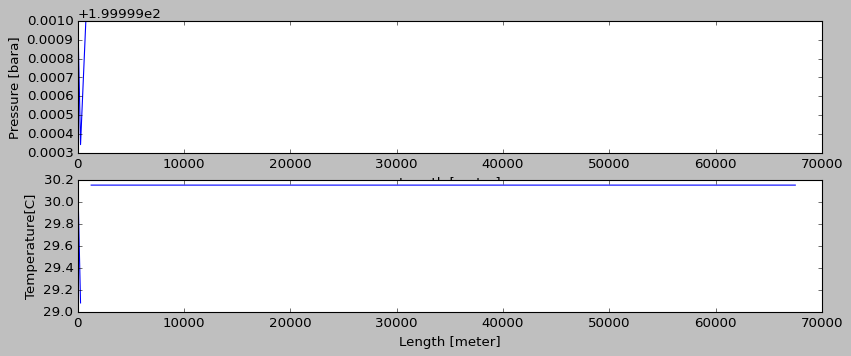

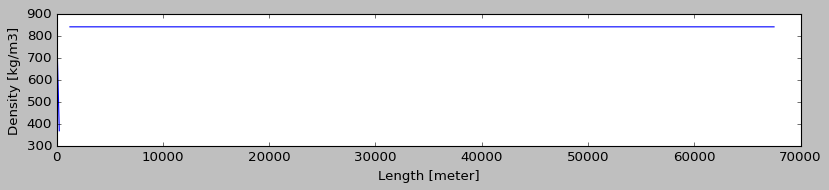

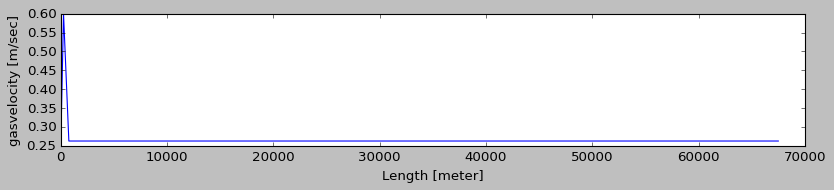

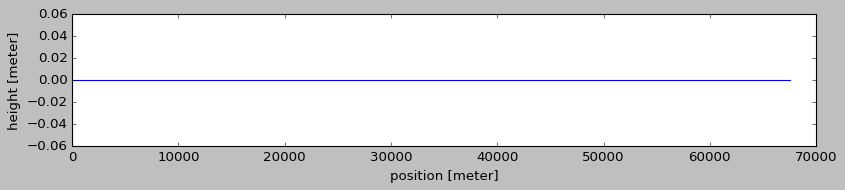

In [27]:
pres = []
temp = []
length = []
height = []
calcdensity = []
gasvelocity = []

for node in range (0,pipe1.getPipe().getTotalNumberOfNodes()-1):
  pres.append(pipe1.getPipe().getNode(node).getBulkSystem().getPressure('bara'))
  temp.append(pipe1.getPipe().getNode(node).getBulkSystem().getTemperature('C'))
  height.append(pipe1.getPipe().getNode(node).getVerticalPositionOfNode())
  length.append(pipe1.getPipe().getNode(node).getDistanceToCenterOfNode())
  calcdensity.append(pipe1.getPipe().getNode(node).getBulkSystem().getDensity('kg/m3'))
  gasvelocity.append(pipe1.getPipe().getNode(node).getVelocity())

plt.rcParams['figure.figsize'] = [12, 12]
plt.figure()
plt.subplot(5, 1, 1)
plt.plot(length, pres, '-')
plt.ylabel('Pressure [bara]')
plt.xlabel('Length [meter]')

plt.subplot(5, 1, 2)
plt.plot(length, temp)
plt.xlabel('Length [meter]')
plt.ylabel('Temperature[C]')

plt.figure()
plt.subplot(5, 1, 3)
plt.plot(length, calcdensity, '-')
plt.ylabel('Density [kg/m3]')
plt.xlabel('Length [meter]')

plt.figure()
plt.subplot(5, 1, 4)
plt.plot(length, gasvelocity, '-')
plt.ylabel('gasvelocity [m/sec]')
plt.xlabel('Length [meter]')

plt.figure()
plt.subplot(5, 1, 5)
plt.plot(length, height, '-')
plt.ylabel('height [meter]')
plt.xlabel('position [meter]')